# Exploring and Transforming JSON Schemas

# Introduction

In this lesson, you'll formalize how to explore a JSON file whose structure and schema is unknown to you. This often happens in practice when you are handed a file or stumble upon one with little documentation.

## Objectives
You will be able to:
* Use the JSON module to load and parse JSON documents
* Load and explore unknown JSON schemas
* Convert JSON to a pandas dataframe

## Loading the JSON file

Load the data from the file `disease_data.json`.

In [1]:
import json
f = open('disease_data.json', 'r')
data = json.load(f)

## Explore the first and second levels of the schema hierarchy

In [2]:
data.keys()
list(data['meta']['view']['columns'])

[{'id': -1,
  'name': 'sid',
  'dataTypeName': 'meta_data',
  'fieldName': ':sid',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'id',
  'dataTypeName': 'meta_data',
  'fieldName': ':id',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'position',
  'dataTypeName': 'meta_data',
  'fieldName': ':position',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'created_at',
  'dataTypeName': 'meta_data',
  'fieldName': ':created_at',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'created_meta',
  'dataTypeName': 'meta_data',
  'fieldName': ':created_meta',
  'position': 0,
  'renderTypeName': 'meta_data',
  'format': {},
  'flags': ['hidden']},
 {'id': -1,
  'name': 'updated_at',
  'dataTypeName': 'meta_data',
  'fieldName': ':updated_at'

## Convert to a DataFrame

Create a DataFrame from the JSON file. Be sure to retrive the column names for the dataframe. (Search within the 'meta' key of the master dictionary.) The DataFrame should include all 42 columns.

In [3]:
import pandas as pd

df = pd.DataFrame(data['data'])
df.columns = [column['name'] for column in data['meta']['view']['columns']]
df.head()

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,1,FF49C41F-CE8D-46C4-9164-653B1227CF6F,1,1527194521,959778,1527194521,959778,None,2016,2016,...,59,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
1,2,F4468C3D-340A-4CD2-84A3-DF554DFF065E,2,1527194521,959778,1527194521,959778,None,2016,2016,...,01,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
2,3,65609156-A343-4869-B03F-2BA62E96AC19,3,1527194521,959778,1527194521,959778,None,2016,2016,...,02,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
3,4,0DB09B00-EFEB-4AC0-9467-A7CBD2B57BF3,4,1527194521,959778,1527194521,959778,None,2016,2016,...,04,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
4,5,D98DA5BA-6FD6-40F5-A9B1-ABD45E44967B,5,1527194521,959778,1527194521,959778,None,2016,2016,...,05,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None


## Level-Up
## Create a bar graph of states with the highest asthma rates for adults age 18+

In [4]:
display(df.info())
display(df['Topic'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60266 entries, 0 to 60265
Data columns (total 42 columns):
sid                          60266 non-null int64
id                           60266 non-null object
position                     60266 non-null int64
created_at                   60266 non-null int64
created_meta                 60266 non-null object
updated_at                   60266 non-null int64
updated_meta                 60266 non-null object
meta                         0 non-null object
YearStart                    60266 non-null object
YearEnd                      60266 non-null object
LocationAbbr                 60266 non-null object
LocationDesc                 60266 non-null object
DataSource                   60266 non-null object
Topic                        60266 non-null object
Question                     60266 non-null object
Response                     0 non-null object
DataValueUnit                60158 non-null object
DataValueType                60266 n

None

Diabetes                                           9895
Chronic Obstructive Pulmonary Disease              6960
Overarching Conditions                             5589
Arthritis                                          5220
Tobacco                                            4730
Asthma                                             4675
Nutrition, Physical Activity, and Weight Status    4188
Alcohol                                            4130
Oral Health                                        3480
Cardiovascular Disease                             3480
Cancer                                             2495
Older Adults                                       1740
Mental Health                                      1195
Immunization                                        870
Chronic Kidney Disease                              870
Disability                                          424
Reproductive Health                                 325
Name: Topic, dtype: int64

In [5]:
asthma_df = df.loc[df['Topic']=='Asthma']
display(asthma_df.info())
asthma_df['Question'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4675 entries, 4725 to 14053
Data columns (total 42 columns):
sid                          4675 non-null int64
id                           4675 non-null object
position                     4675 non-null int64
created_at                   4675 non-null int64
created_meta                 4675 non-null object
updated_at                   4675 non-null int64
updated_meta                 4675 non-null object
meta                         0 non-null object
YearStart                    4675 non-null object
YearEnd                      4675 non-null object
LocationAbbr                 4675 non-null object
LocationDesc                 4675 non-null object
DataSource                   4675 non-null object
Topic                        4675 non-null object
Question                     4675 non-null object
Response                     0 non-null object
DataValueUnit                4675 non-null object
DataValueType                4675 non-null object

None

Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma       870
Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma       870
Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma    870
Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma    870
Current asthma prevalence among adults aged >= 18 years                                    870
Asthma prevalence among women aged 18-44 years                                             325
Name: Question, dtype: int64

In [31]:
asthma_df = asthma_df.loc[(asthma_df['Question']=='Current asthma prevalence among adults aged >= 18 years') 
                             & (asthma_df['StratificationCategoryID1']=='OVERALL')
                             & (asthma_df['DataValueTypeID']=='CRDPREV')]
asthma_df.dropna(axis=0, subset=['DataValue'], inplace=True)
asthma_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 9370 to 9424
Data columns (total 42 columns):
sid                          55 non-null int64
id                           55 non-null object
position                     55 non-null int64
created_at                   55 non-null int64
created_meta                 55 non-null object
updated_at                   55 non-null int64
updated_meta                 55 non-null object
meta                         0 non-null object
YearStart                    55 non-null object
YearEnd                      55 non-null object
LocationAbbr                 55 non-null object
LocationDesc                 55 non-null object
DataSource                   55 non-null object
Topic                        55 non-null object
Question                     55 non-null object
Response                     0 non-null object
DataValueUnit                55 non-null object
DataValueType                55 non-null object
DataValue                    55 no

/Users/stlanier/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Percent of Adults 18+ with Asthma')

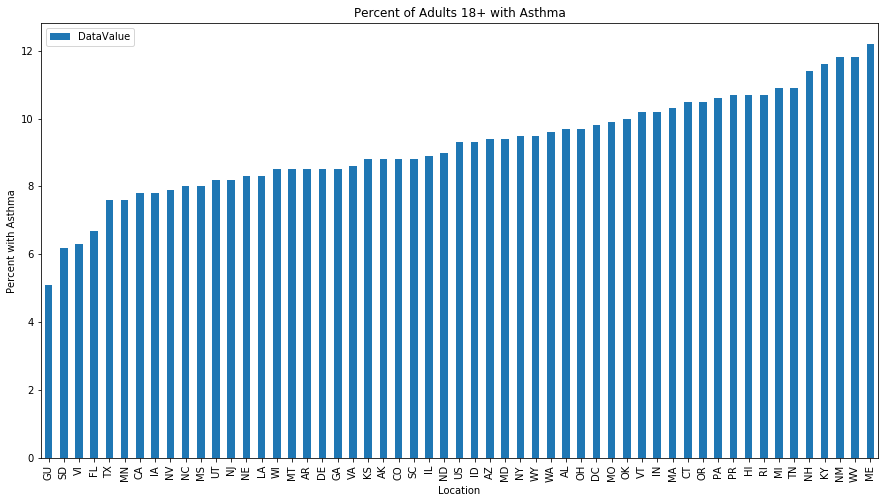

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

asthma_df['DataValue'] = asthma_df['DataValue'].astype('float')
asthma_df = asthma_df[['LocationAbbr', 'DataValue']].sort_values(by='DataValue')

ax = asthma_df.plot(kind='bar', x='LocationAbbr', figsize=(15,8))
ax.set_ylabel('Percent with Asthma')
ax.set_xlabel('Location')
ax.set_title('Percent of Adults 18+ with Asthma')

# fig = plt.figure(figsize=(10, 8))
# ax = plt.bar(x=asthma_df.index, y=asthma_df['DataValue'], height=10)

## Summary

Well done! In this lab you got some extended practice exploring the structure of JSON files, converting json files to pandas DataFrame, and visualizing data!